In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
Dataset="/content/drive/MyDrive/Signature/BHSig260-Bengali/dataset"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['98', '95', '99', '97', '96', '94', '93', '92', '91', '90', '89', '87', '9', '86', '88', '85', '84', '83', '82', '81', '80', '78', '77', '79', '8', '76', '75', '74', '73', '72', '7', '68', '70', '69', '71', '67', '66', '65', '64', '63', '59', '61', '62', '6', '60', '58', '57', '56', '55', '54', '5', '50', '52', '53', '51', '49', '48', '47', '46', '45', '43', '42', '41', '44', '40', '4', '39', '38', '37', '36', '35', '34', '29', '28', '31', '30', '3', '33', '32', '27', '26', '25', '24', '23', '21', '22', '19', '20', '2', '18', '17', '16', '15', '14', '13', '1', '0', '12', '11', '10']


In [ ]:
images = []
classNo = []
classes = 100
epochs_val = 50
batch_size = 32
imageDimensions = (360,100,3)

In [ ]:
# Load the saved arrays
X_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_test.npy')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4320, 360, 100, 3) (1080, 360, 100, 3) (4320, 100) (1080, 100)


In [ ]:
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [ ]:
Inc_V3 = InceptionV3(input_shape=imageDimensions, 
                  weights='imagenet', 
                  include_top=False)

for layer in Inc_V3.layers:
  layer.trainable = False

In [ ]:
# No of layers
x = Flatten()(Inc_V3.output)
prediction = Dense(classes, activation='softmax')(x)

# create a model object
model = Model(inputs=Inc_V3.input, outputs=prediction)

# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 360, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 179, 49, 32)  864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 179, 49, 32)  96         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs_val, 
                    validation_data=(X_test, y_test))

Epoch 1/50
135/135 [==============================] - 33s 95ms/step - loss: 879.9739 - accuracy: 0.1282 - val_loss: 261.2300 - val_accuracy: 0.2306
Epoch 2/50
135/135 [==============================] - 7s 51ms/step - loss: 172.1627 - accuracy: 0.3815 - val_loss: 156.4093 - val_accuracy: 0.4056
Epoch 3/50
135/135 [==============================] - 7s 53ms/step - loss: 139.3098 - accuracy: 0.4954 - val_loss: 126.6040 - val_accuracy: 0.5000
Epoch 4/50
135/135 [==============================] - 7s 51ms/step - loss: 114.3461 - accuracy: 0.5620 - val_loss: 135.2342 - val_accuracy: 0.4991
Epoch 5/50
135/135 [==============================] - 8s 61ms/step - loss: 119.9619 - accuracy: 0.5738 - val_loss: 132.1866 - val_accuracy: 0.5583
Epoch 6/50
135/135 [==============================] - 7s 51ms/step - loss: 91.7982 - accuracy: 0.6525 - val_loss: 117.0828 - val_accuracy: 0.5741
Epoch 7/50
135/135 [==============================] - 7s 52ms/step - loss: 92.5654 - accuracy: 0.6562 - val_loss: 185.

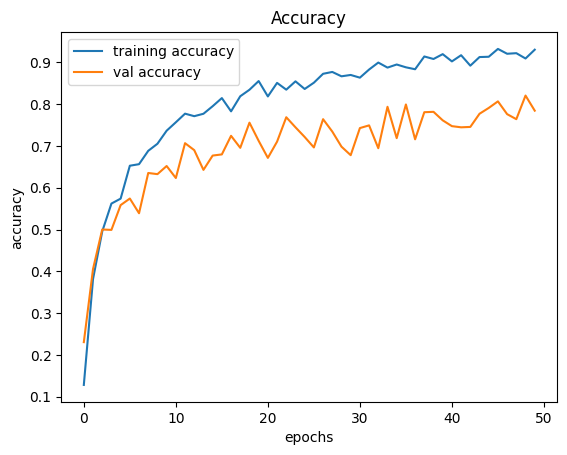

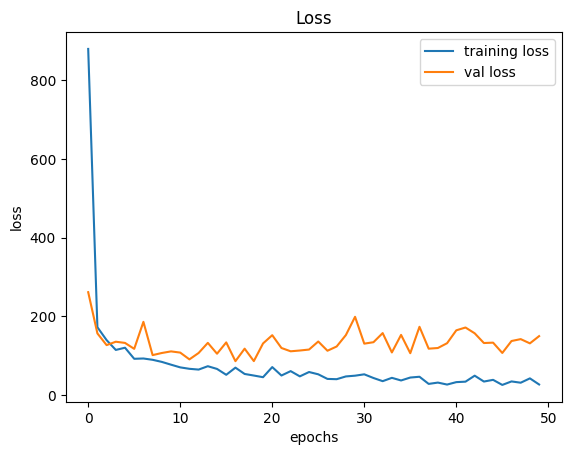

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9298611283302307


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7842592597007751


In [ ]:
pred = np.argmax(model.predict(X_test), axis = 1)

34/34 [==============================] - 3s 41ms/step


In [ ]:
actual=np.argmax(y_test, axis = 1)

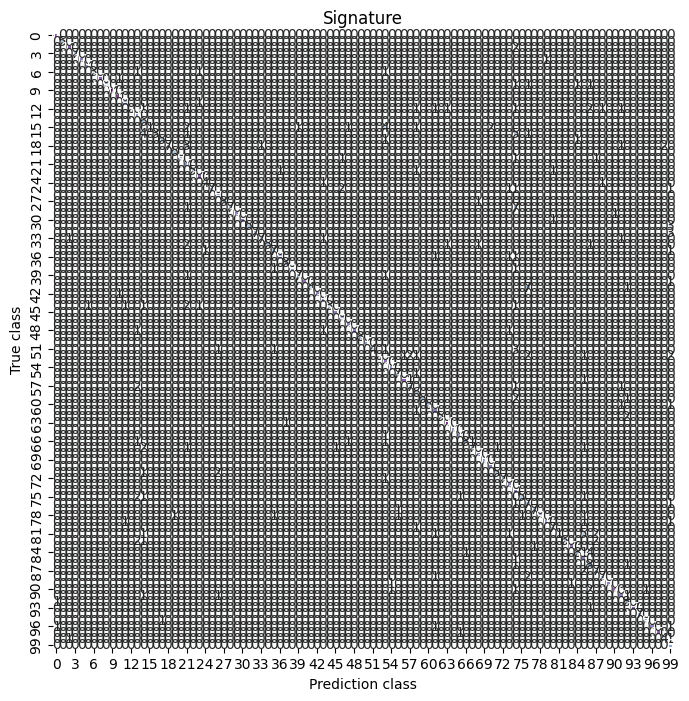

In [ ]:
cm = confusion_matrix(actual, pred)
# cm_df = pd.DataFrame(cm)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True,cmap='BuPu',cbar=False,linewidth=2,fmt='d')
plt.title('Signature')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
cf = classification_report(actual, pred)
print(cf)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      1.00      1.00         5
           2       0.87      0.87      0.87        15
           3       1.00      1.00      1.00         7
           4       1.00      0.92      0.96        12
           5       0.91      1.00      0.95        10
           6       1.00      0.50      0.67         6
           7       1.00      0.93      0.96        14
           8       1.00      0.69      0.82        13
           9       1.00      1.00      1.00        20
          10       0.89      1.00      0.94        16
          11       0.82      0.90      0.86        10
          12       0.00      0.00      0.00        10
          13       0.53      1.00      0.69        10
          14       0.32      1.00      0.48         6
          15       1.00      0.08      0.15        12
          16       1.00      0.21      0.35        14
          17       0.86    